
***
<h2 align="center">Data Audit Report</h2> 

***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load datasets
dataset1 = pd.read_excel("datasets/dataset1.xlsm")
dataset2 = pd.read_excel("datasets/dataset2.xlsm")

***
<h3 align="center">Dataset 1</h3> 

***

In [117]:
dataset1.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,7439,242.0,1,0,0
4,5,1,14.17,0.83,52,19,0,NaN,0,49644,397.0,2,0,0


***
### Basic info
***

In [79]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_Number                 2000 non-null   int64  
 1   Blood_Pressure_Abnormality     2000 non-null   int64  
 2   Level_of_Hemoglobin            2000 non-null   float64
 3   Genetic_Pedigree_Coefficient   1908 non-null   float64
 4   Age                            2000 non-null   int64  
 5   BMI                            2000 non-null   int64  
 6   Sex                            2000 non-null   int64  
 7   Pregnancy                      442 non-null    float64
 8   Smoking                        2000 non-null   int64  
 9   salt_content_in_the_diet       2000 non-null   int64  
 10  alcohol_consumption_per_day    1758 non-null   float64
 11  Level_of_Stress                2000 non-null   int64  
 12  Chronic_kidney_disease         2000 non-null   i

#### Number of missing data

In [110]:
dataset1.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

#### Missing data heatmap

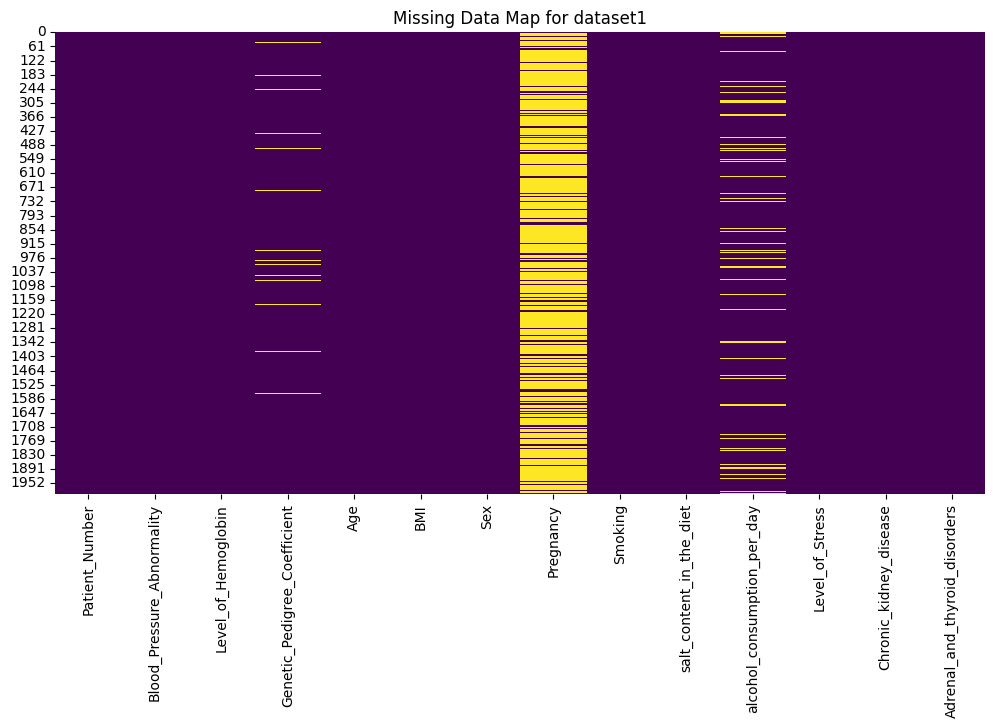

In [104]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset1.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Map for dataset1")
plt.show()

### Conclusions:
- Since all the data in the dataset are numerical, it's important to clarify in the prompt the meaning of some categorical variables so that the model can interpret them correctly. For example: 0 represents "male" and 1 represents "female" for the gender variable.
- A lot of missing data in "pregnancy" variable.
- For missing data, I suggest filling in the values as follows:
    - For the "pregnancy" variable fill with 0.
    - For the "Genetic_Pedigree_Coefficient" variable, use the median value of the existing data, as this will minimize the impact of outliers while          providing a reasonable estimate.
    - For the "alcohol_consumption_per_day" variable, use the median value as well, as it reflects the central tendency and can fill in missing values        without introducing bias.

### Feature Engineering:
- Add age group column for grouping by the following categories: -> "0-18", "19-25", "26-35", "36-45", "46-55", "56-65", "66-75", "76-100"
- Add BMI category column for grouping by the following categories: -> "Underweight", "Normal", "Overweight", "Obese"

***
### Statistics
***

In [81]:
dataset1.describe()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
count,2000.000000,2000.000000,2000.000000,1908.000000,2000.000000,2000.000000,2000.000000,442.000000,2000.000000,2000.000000,1758.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,0.493500,11.710035,0.494817,46.558500,30.081500,0.496000,0.450226,0.509500,24926.097000,251.008532,2.012500,0.356500,0.298000
std,577.494589,0.500083,2.186701,0.291736,17.107832,11.761208,0.500109,0.498080,0.500035,14211.692586,143.651884,0.823822,0.479085,0.457494
min,1.000000,0.000000,8.100000,0.000000,18.000000,10.000000,0.000000,0.000000,0.000000,22.000000,0.000000,1.000000,0.000000,0.000000
25%,500.750000,0.000000,10.147500,0.240000,32.000000,20.000000,0.000000,0.000000,0.000000,13151.750000,126.250000,1.000000,0.000000,0.000000
50%,1000.500000,0.000000,11.330000,0.490000,46.000000,30.000000,0.000000,0.000000,1.000000,25046.500000,250.000000,2.000000,0.000000,0.000000
75%,1500.250000,1.000000,12.945000,0.740000,62.000000,40.000000,1.000000,1.000000,1.000000,36839.750000,377.750000,3.000000,1.000000,1.000000
max,2000.000000,1.000000,17.560000,1.000000,75.000000,50.000000,1.000000,1.000000,1.000000,49976.000000,499.000000,3.000000,1.000000,1.000000


***
### Distribution analysis for some key variables
***

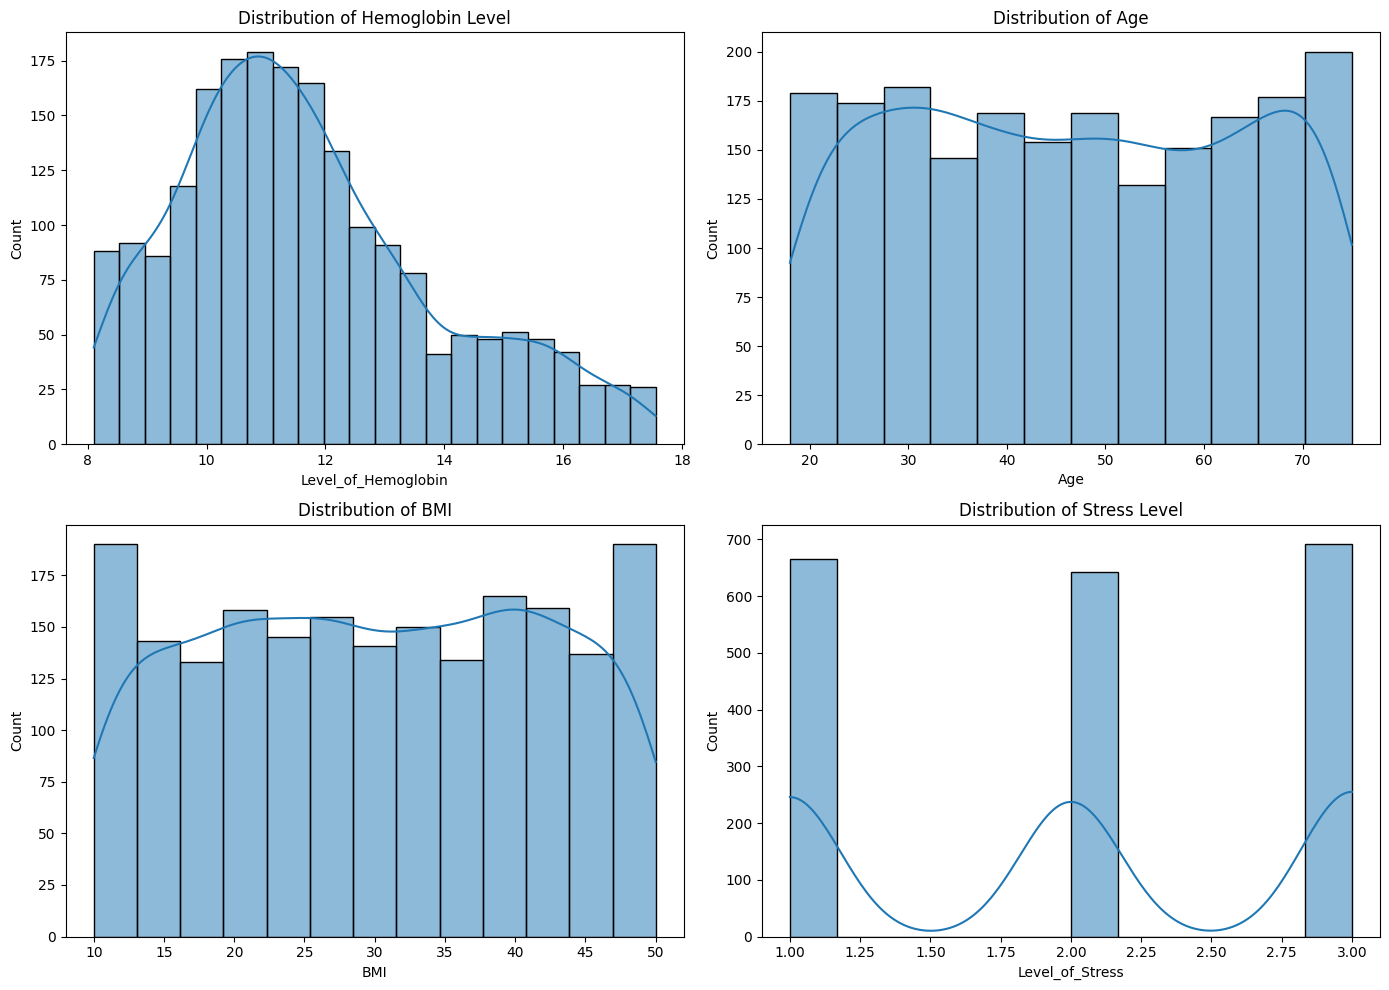

In [88]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(dataset1["Level_of_Hemoglobin"], kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Hemoglobin Level")

sns.histplot(dataset1["Age"], kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Age")

sns.histplot(dataset1["BMI"], kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of BMI")

sns.histplot(dataset1["Level_of_Stress"], kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Stress Level")

plt.tight_layout()
plt.show()

### Variable Distributions:

- A lot of patients have extreme bmi values (check the correctness of this values)
- Uniform distribution of stress levels and age.

### Correlations Between Variables::
Potential correlations may exist between:

- Blood_Pressure_Abnormality and BMI or salt_content_in_the_diet.
- Level_of_Stress, Alcohol_consumption_per_day and Smoking

***
<h3 align="center">Dataset 2</h3> 

***

In [118]:
dataset2.head()

,Patient_Number,Day_Number,Physical_activity
0,1,1,23590.0
1,1,2,10411.0
2,1,3,7815.0
3,1,4,12366.0
4,1,5,NaN


***
### Basic info
***

In [80]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient_Number     20000 non-null  int64  
 1   Day_Number         20000 non-null  int64  
 2   Physical_activity  16159 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 468.9 KB


***
### Missing data
***

#### Number of missing data

In [111]:
dataset2.isnull().sum()

Patient_Number          0
Day_Number              0
Physical_activity    3841
dtype: int64

#### Missing data heatmap

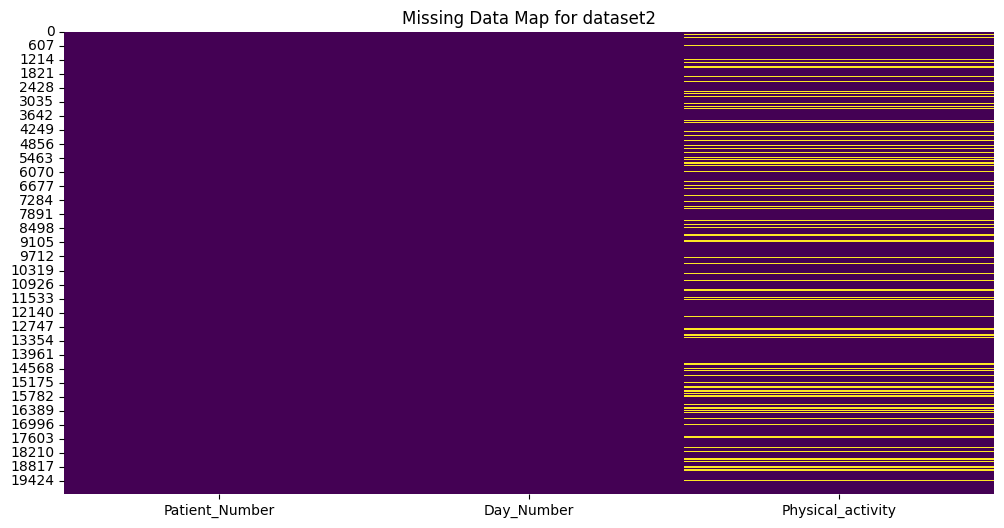

In [113]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset2.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Map for dataset2")
plt.show()

### Conclusions:
- We can join dataset1 and dataset2 using the Patient_Number.
- Due to significant missing data, I suggest replacing the "Physical_activity" column with a column containing the median value for each patient. This will help reduce the data and standardize the datasets.

### Feature Engineering:
- Add 'activity_level' column for grouping by the following categories:  -> "sedentary", "lightly_active", "moderately_active", "very_active"

***
### Statistics
***

In [82]:
dataset2.describe()

,Patient_Number,Day_Number,Physical_activity
count,20000.000000,20000.000000,16159.000000
mean,1000.500000,5.500000,25353.499969
std,577.364631,2.872353,9885.999907
min,1.000000,1.000000,628.000000
25%,500.750000,3.000000,18564.000000
50%,1000.500000,5.500000,25488.000000
75%,1500.250000,8.000000,32080.000000
max,2000.000000,10.000000,49980.000000


***
### Distribution analysis for Physical Activity
***

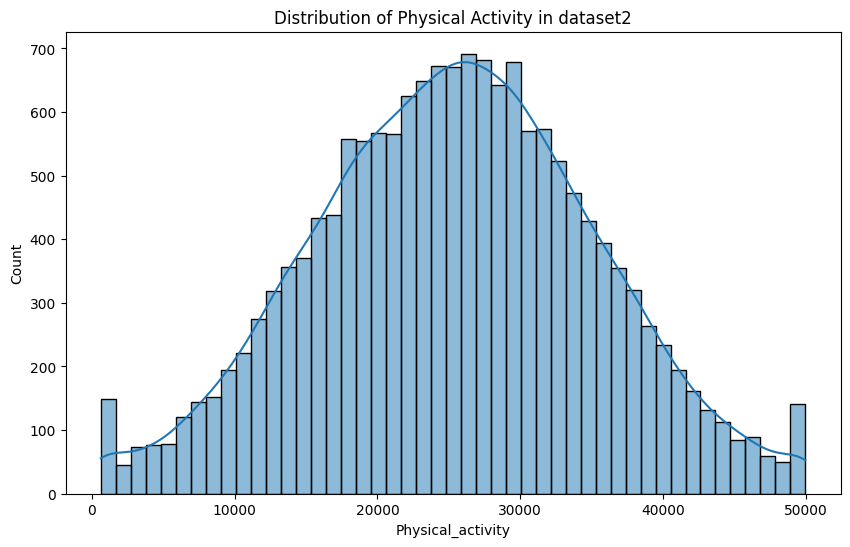

In [99]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset2["Physical_activity"], kde=True)
plt.title("Distribution of Physical Activity in dataset2")
plt.show()

### Variable Distributions:

- Physical_activity shows a sharp peak in the range of about 20,000-30,000, but there are also extreme values.

### Correlations Between Variables::
Potential correlations may exist between:

- 'Physical_activity' with 'BMI', 'age' and 'alcohol_consumption_per_day' 